In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style for plots

In [2]:
sns.set(style="whitegrid")

# 1. Load the datasets

In [3]:
orders = pd.read_csv('orders.csv')
order_details = pd.read_csv('order_details.csv')
pizzas = pd.read_csv('pizzas.csv')
pizza_types = pd.read_csv('pizza_types.csv', encoding='unicode_escape')

# 2. Join the data into a single DataFrame for analysis

In [4]:
df = order_details.merge(pizzas, on='pizza_id', how='left')
df = df.merge(orders, on='order_id', how='left')
df = df.merge(pizza_types, on='pizza_type_id', how='left')

## Convert date and time to datetime objects

In [5]:
df['date'] = pd.to_datetime(df['date'])
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
df['revenue'] = df['quantity'] * df['price']

## --- ANALYSIS QUESTIONS ---

### Q1: What is the total revenue/sales?

In [6]:
total_revenue = df['revenue'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $817,860.05


### Q2: Find the total quantity sold.

In [7]:
total_quantity = df['quantity'].sum()
print(f"Total Quantity Sold: {total_quantity:,}")

Total Quantity Sold: 49,574


### Q3: Find the total orders.

In [8]:
total_orders = orders['order_id'].nunique()
print(f"Total Orders: {total_orders:,}")

Total Orders: 21,350


### Q4: How many pizza types do they sell?

In [9]:
pizza_types_count = pizza_types['pizza_type_id'].nunique()
print(f"Number of Pizza Types Sold: {pizza_types_count}")

Number of Pizza Types Sold: 32


### Q5: Find the average price of the pizzas.

In [11]:
avg_price = pizzas['price'].mean()
print(f"Average Pizza Price: ${avg_price:.2f}")

Average Pizza Price: $16.44


### Q6: What are the peak hours of sales?

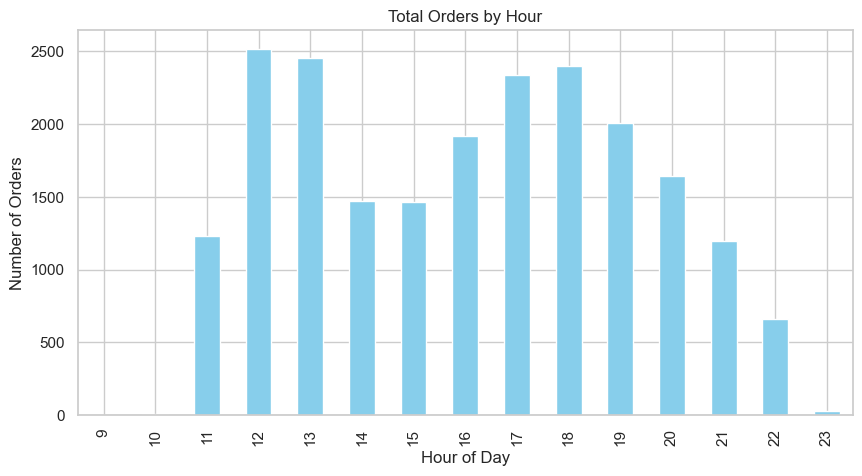

In [12]:
peak_hours = df.groupby('hour')['order_id'].nunique()
plt.figure(figsize=(10, 5))
peak_hours.plot(kind='bar', color='skyblue')
plt.title('Total Orders by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()

### Q7: Find total sales per day of the week. Which day is highest?

In [13]:
df['day_name'] = df['date'].dt.day_name()
sales_by_day = df.groupby('day_name')['revenue'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
print("\nSales by Day of the Week:")
print(sales_by_day)
print(f"Highest Sales Day: {sales_by_day.idxmax()}")


Sales by Day of the Week:
day_name
Monday       107329.55
Tuesday      114133.80
Wednesday    114408.40
Thursday     123528.50
Friday       136073.90
Saturday     123182.40
Sunday        99203.50
Name: revenue, dtype: float64
Highest Sales Day: Friday


### Q8: Find the top 5 bestselling pizzas

In [14]:
top_5_pizzas = df.groupby('name')['quantity'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Bestselling Pizzas:")
print(top_5_pizzas)


Top 5 Bestselling Pizzas:
name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64


### Q9: Find the sales made in each month.

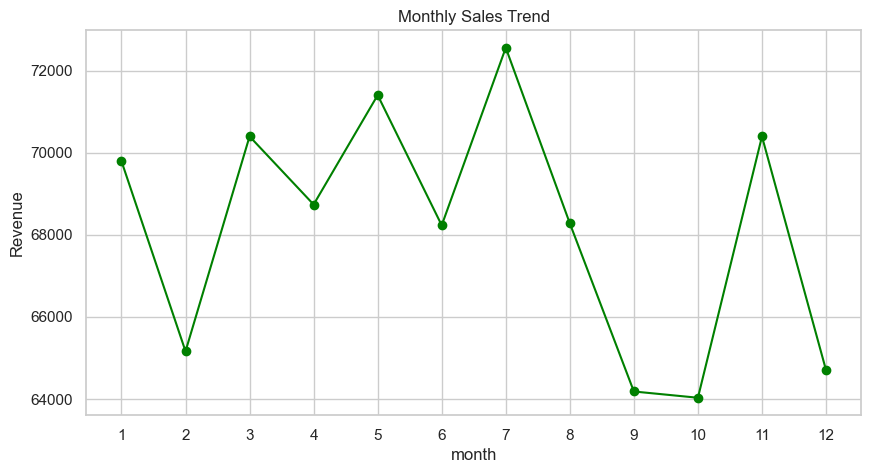

In [16]:
df['month'] = df['date'].dt.month
monthly_sales = df.groupby('month')['revenue'].sum()
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.xticks(range(1, 13))
plt.ylabel('Revenue')
plt.show()

### Q10: Pizza types not doing well (Bottom 5).

In [17]:
bottom_pizzas = df.groupby('name')['revenue'].sum().sort_values(ascending=True).head(5)
print("\nBottom 5 Pizzas (Lowest Revenue):")
print(bottom_pizzas)


Bottom 5 Pizzas (Lowest Revenue):
name
The Brie Carre Pizza         11588.50
The Green Garden Pizza       13955.75
The Spinach Supreme Pizza    15277.75
The Mediterranean Pizza      15360.50
The Spinach Pesto Pizza      15596.00
Name: revenue, dtype: float64


## Insights and Methodology

### 1. Data Integration: all four CSV files (Orders, Order Details, Pizzas, and Pizza Types) were merged into a single master data frame for seamless calculation.

### 2. Revenue Calculation: Total revenue was derived by multiplying the quantity of each item by its unit price

### 3. Peak Hours: The analysis uses the hour component of the order time to identify when the kitchen is busiest

### 4. Trends: Line and bar charts are utilized to visualize monthly and hourly fluctuations, helping to identify seasonal or daily patterns in customer behavior